In [21]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## 2014 entrant counts

In [7]:
entrants2014 = pd.read_csv('data/2014_participating_countries.txt', header=None, names=['country', 'entries'])
print entrants2014.dtypes
print entrants2014.shape
entrants2014.head()

country    object
entries     int64
dtype: object
(58, 2)


,country,entries
0,Argentina,8
1,Australia,80
2,Austria,32
3,Belgium,89
4,Belize,4


In [14]:
entry_count = np.sum(entrants2014.entries)
entry_count

4753L

In [16]:
entrants2014['perOfTotal'] = entrants2014.entries/entry_count

In [38]:
topTen2014 = entrants2014.sort_values('entries', axis=0, ascending=False).head(10)
topTen2014.reset_index(drop=True)

,country,entries,perOfTotal
0,United States,3402,0.715758
1,Germany,249,0.052388
2,Canada,190,0.039975
3,Belgium,89,0.018725
4,Australia,80,0.016831
5,Japan,71,0.014938
6,United Kingdom,69,0.014517
7,Brazil,63,0.013255
8,Italy,63,0.013255
9,New Zealand,50,0.010520


In [39]:
topTen2014

,country,entries,perOfTotal
56,United States,3402,0.715758
21,Germany,249,0.052388
8,Canada,190,0.039975
3,Belgium,89,0.018725
1,Australia,80,0.016831
31,Japan,71,0.014938
55,United Kingdom,69,0.014517
6,Brazil,63,0.013255
30,Italy,63,0.013255
38,New Zealand,50,0.010520


In [20]:
np.sum(topTen2014.perOfTotal)

0.910162002945508

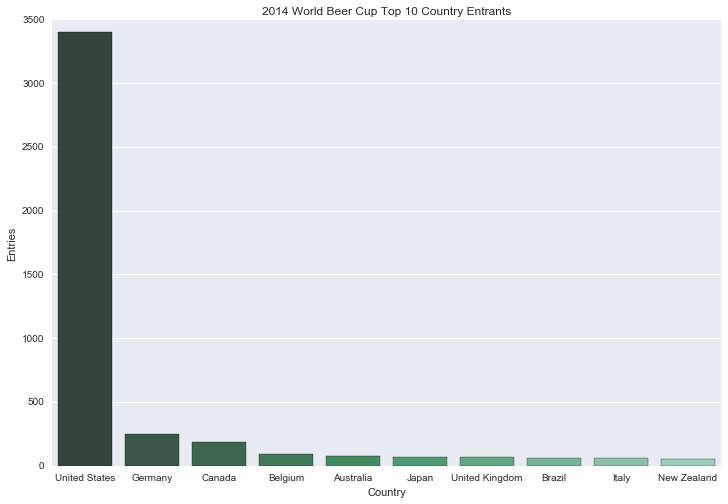

In [41]:
plt.figure(figsize=(12,8))
sns.plt.title("2014 World Beer Cup Top 10 Country Entrants")
sns.barplot(topTen2014.country, topTen2014.entries, palette="BuGn_d")
sns.plt.xlabel("Country")
sns.plt.ylabel("Entries")
sns.plt.savefig('img/wbc_2014_top10entrants.png')

## 2014 awards by country

In [46]:
winners2014 = pd.read_csv('data/2014_award_counts_country.txt', header=None, names=['country', 'awards'])
print winners2014.dtypes
winners2014['perOfTot'] = winners2014.awards/np.sum(winners2014.awards)
print winners2014.shape
winners2014.sort_values('awards', axis=0, ascending=False)

country    object
awards      int64
dtype: object
(22, 3)


,country,awards,perOfTot
21,United States,205,0.729537
7,Germany,27,0.096085
4,Canada,7,0.024911
2,Belgium,5,0.017794
20,United Kingdom,5,0.017794
10,Italy,4,0.014235
14,Netherlands,3,0.010676
0,Australia,3,0.010676
5,Czech Republic,3,0.010676
11,Japan,3,0.010676


In [47]:
winners2014.sort_values('awards', axis=0, ascending=False).head(10)

,country,awards,perOfTot
21,United States,205,0.729537
7,Germany,27,0.096085
4,Canada,7,0.024911
2,Belgium,5,0.017794
20,United Kingdom,5,0.017794
10,Italy,4,0.014235
14,Netherlands,3,0.010676
0,Australia,3,0.010676
5,Czech Republic,3,0.010676
11,Japan,3,0.010676


In [49]:
np.sum(winners2014.sort_values('awards', axis=0, ascending=False).head(10)['perOfTot'])

0.9430604982206405

In [51]:
WBC = pd.read_csv('data/wbc_PDF98_14c.csv')
WBC.tail()

,Unnamed: 0,award,beer,brewery,category,origin,year,city,country_state,country,category_num,entries,category_name
2266,NaN,Bronze,Veritas 002,Port Brewing Co. and The Lost Abbey,"Category 13: Experimental Beer (Lager or Ale),...","San Marcos, CA",2008,San Marcos,CA,USA,Category 13,27,Experimental Beer (Lager or Ale)
2267,NaN,Silver,Hopsquatch '06,Four Peaks Brewing Co.,"Category 18: Aged Beer (Ale or Lager), 25 Entries","Tempe, AZ",2008,Tempe,AZ,USA,Category 18,25,Aged Beer (Ale or Lager)
2268,NaN,Gold,Alaskan Smoked Porter 2007,Alaskan Brewing Co.,"Category 20: Smoke-Flavored Beer, 27 Entries","Juneau, AK",2008,Juneau,AK,USA,Category 20,27,Smoke-Flavored Beer
2269,NaN,Gold,Saint Arnold Divine Reserve No. 4,Saint Arnold Brewing Co,"Category 64: Strong Scotch Ale, 43 Entries","Houston, TX",2008,Houston,TX,USA,Category 64,43,Strong Scotch Ale
2270,NaN,Silver,Hopsquatch '07,Four Peaks Brewing Co.,"Category 68: Barley Wine-Style Ale, 61 Entries","Tempe, AZ",2008,Tempe,AZ,USA,Category 68,61,Barley Wine-Style Ale


In [56]:
usa2014 = WBC[(WBC.country=="USA") & (WBC.year==2014)]
print usa2014.shape
usa2014.head()

(202, 13)


,Unnamed: 0,award,beer,brewery,category,origin,year,city,country_state,country,category_num,entries,category_name
1939,1940,Gold,Float Trip,Piney River Brewing Co.,"Category 1: American-Style Wheat Beer, 23 Entries","Bucyrus, MO",2014,Bucyrus,MO,USA,Category 1,23,American-Style Wheat Beer
1940,1941,Silver,Red Dawn,Carson�s Brewery,"Category 1: American-Style Wheat Beer, 23 Entries","Evansville, IN",2014,Evansville,IN,USA,Category 1,23,American-Style Wheat Beer
1941,1942,Bronze,DD Blonde,Hop Valley Brewing Co.,"Category 1: American-Style Wheat Beer, 23 Entries","Eugene, OR",2014,Eugene,OR,USA,Category 1,23,American-Style Wheat Beer
1942,1943,Gold,Hefeweizen,Widmer Brothers Brewing Co.,Category 2: American-Style Wheat Beer With Yea...,"Portland, OR",2014,Portland,OR,USA,Category 2,25,American-Style Wheat Beer With Yeast
1943,1944,Silver,White Noise,�berbrew,Category 2: American-Style Wheat Beer With Yea...,"Billings, MT",2014,Billings,MT,USA,Category 2,25,American-Style Wheat Beer With Yeast


In [60]:
states2014 = usa2014.groupby('country_state')

In [67]:
states2014.award.count().sort_values(ascending=False).head()

country_state
CA    36
CO    22
OR    17
IL     8
WA     8
Name: award, dtype: int64

### IBM data science workbench, "Tutorial \#2 - Explore & Visualize"

In [70]:
WBC.award.value_counts()

Silver    764
Bronze    754
Gold      753
Name: award, dtype: int64

In [72]:
award_by_country = WBC.groupby(['country', 'award']).size()
award_by_country.head(12)

country    award 
Argentina  Bronze     1
           Gold       2
           Silver     1
Australia  Bronze    13
           Gold      14
           Silver     9
Austria    Bronze     4
           Gold       5
           Silver     7
Belgium    Bronze    21
           Gold      37
           Silver    24
dtype: int64

In [74]:
award_by_country_df = award_by_country.unstack()
award_by_country_df.head()

award,Bronze,Gold,Silver
country,,,
Argentina,1,2,1
Australia,13,14,9
Austria,4,5,7
Belgium,21,37,24
Bolivia,1,1,NaN


In [75]:
award_by_country_df.fillna(0, inplace=True)

In [76]:
award_by_country_df.idxmax()

award
Bronze    USA
Gold      USA
Silver    USA
dtype: object

In [77]:
award_by_country_df.sort('Gold', ascending=False, inplace=True)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [79]:
award_by_country_df = award_by_country_df[['Gold', 'Silver', 'Bronze']]
award_by_country_df.head(10)

award,Gold,Silver,Bronze
country,,,
USA,534,529,532
Germany,63,67,64
Belgium,37,24,21
Canada,21,35,36
Japan,14,23,26
Australia,14,9,13
UK,11,8,6
Czech Republic,7,8,6
Singapore,5,1,1


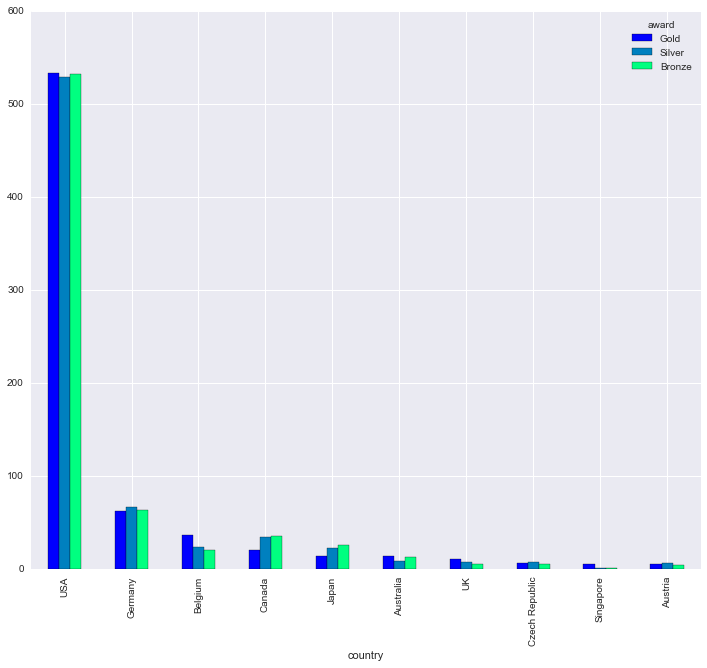

In [89]:
award_by_country_df[:10].plot(kind='bar', figsize=(12,10), colormap='winter')

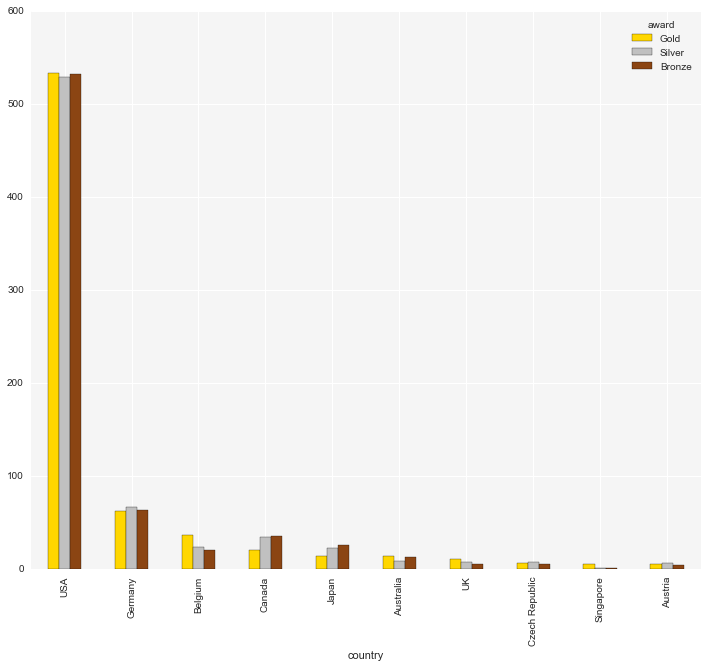

In [119]:
plot_colors = ['gold', 'silver', 'saddlebrown']
award_by_country_df[:10].plot(kind='bar', figsize=(12,10), color=plot_colors)

In [90]:
usa_award_year = WBC[WBC.country=="USA"].groupby('year').size()
usa_award_year

year
1996     99
1998    118
2000    118
2002    141
2004    157
2006    159
2008    190
2010    203
2012    208
2014    202
dtype: int64

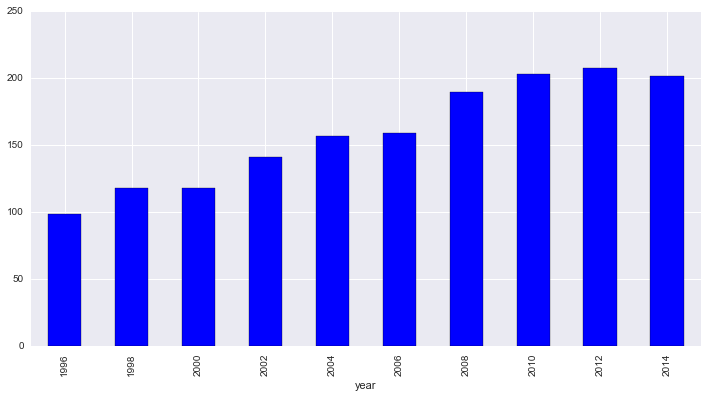

In [91]:
usa_award_year.plot(kind='bar', figsize=(12,6))

### IBM data science workbench, "Tutorial \#4 - Analyze Data"

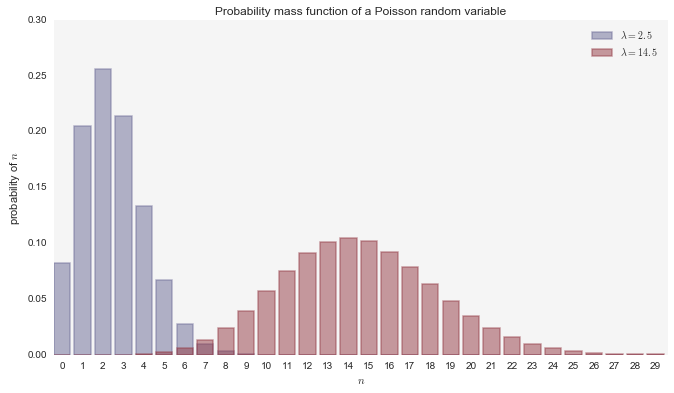

In [92]:
from IPython.core.pylabtools import figsize
plt.rcParams['axes.facecolor'] = '#F5F5F5'

figsize(11, 6)

import scipy.stats as stats
a = np.arange(30)
poi = stats.poisson
lambdas = [2.5, 14.5]
colors = ["#6B6A96", "#943A45"]

# plot a Poisson distribution for each lambda
for lambda_, color in zip(lambdas, colors):
    plt.bar(a, poi.pmf(a, lambda_), color=color,
            label="$\lambda = %.1f$" % lambda_, alpha=0.50,
            edgecolor=color, lw="1.5")

plt.title("Probability mass function of a Poisson random variable")
plt.legend()
plt.grid()
plt.ylabel("probability of $n$")
plt.xticks(a + 0.4, a)
plt.xlabel("$n$")
plt.show()

In [95]:
# conda install -c https://conda.binstar.org/pymc pymc

In [96]:
import pymc as pm
import numpy as np

def make_model(data):
    '''
    Create a model for use in predicting lambda_1, lambda_2, and tau,
    which combine to create our posterior probability distributions
    (one before tau, and one after tau).
    '''
    # prior lambda estimates
    alpha = 1.0 / data.mean() 
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    # prior tau estimates
    tau = pm.DiscreteUniform("tau", lower=0, upper=len(data))

    @pm.deterministic
    def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
        '''Create random value of lambda, based on prior lambda.'''
        out = np.zeros(len(data))
        out[:tau] = lambda_1  # lambda before tau
        out[tau:] = lambda_2  # lambda after (and including) tau
        return out
    
    # lambda is Poisson distributed
    observation = pm.Poisson("obs", lambda_, value=data.values, observed=True)

    model = pm.Model([observation, lambda_1, lambda_2, tau])
    return model

In [97]:
model = make_model(usa_award_year)

In [98]:
mcmc = pm.MCMC(model)
mcmc.sample(50000, 10000, 1)

 [-----------------100%-----------------] 50000 of 50000 complete in 10.7 sec

In [99]:
lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
tau_samples = mcmc.trace('tau')[:]

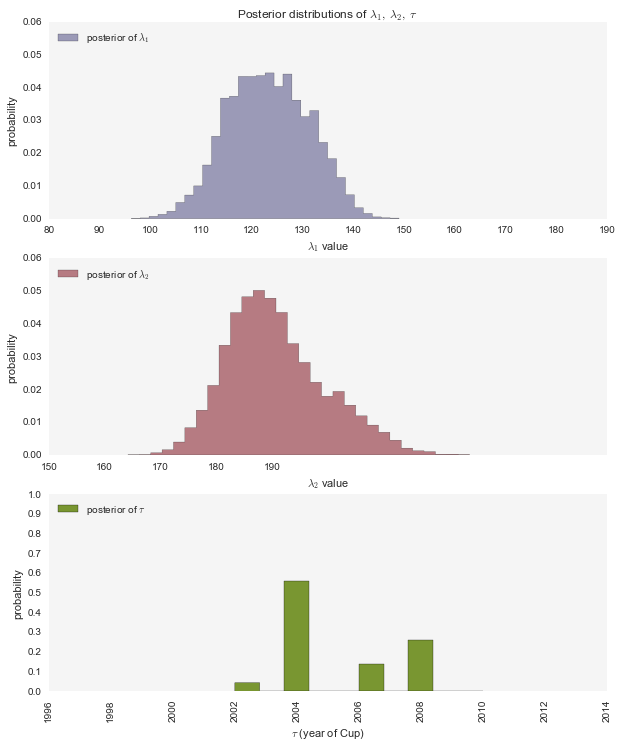

In [121]:
# our data
data = usa_award_year
n_data = len(data)
years = data.index.values

figsize(10, 12)
xticks = np.arange(80, 200, 10)
yticks = np.arange(0.0, 1.1, 0.1)

# lambda_1
ax = plt.subplot(311)
ax.set_autoscaley_on(False)
plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.65,
         label="posterior of $\lambda_1$", color="#6B6A96", normed=True)
plt.legend(loc="upper left")
plt.xticks(xticks)
# plt.yticks(yticks)
plt.ylim([0., .06])
plt.xlabel("$\lambda_1$ value")
plt.ylabel("probability");
plt.title(r"""Posterior distributions of $\lambda_1,\;\lambda_2,\;\tau$""")
plt.grid()

# lambda_2
ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.65,
         label="posterior of $\lambda_2$", color="#943A45", normed=True)
plt.legend(loc="upper left")
plt.xticks(xticks)
# plt.xlim([xticks.min(), xticks.max()])
plt.xlim([150, 250])
# plt.yticks(yticks)
plt.ylim([0., .06])
plt.xlabel("$\lambda_2$ value")
plt.ylabel("probability");
plt.grid()

# tau
ax = plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#799631", weights=w, rwidth=2.)
plt.legend(loc="upper left")
plt.xticks(np.arange(n_data), years, rotation='vertical')
plt.yticks(yticks)
plt.xlabel(r"$\tau$ (year of Cup)")
plt.ylabel("probability");
plt.grid()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: the 'cols' keyword is deprecated, use 'subset' instead


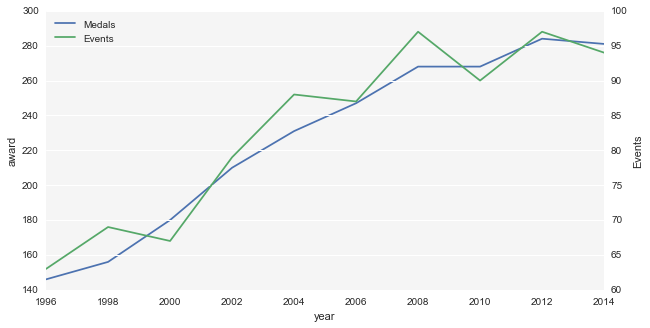

In [102]:
# plot medals awarded per games
ax = WBC.groupby('year').size()\
.plot(figsize=(10,5), legend=True, label='Medals')
ax.set_ylabel('award')

# plot events per games
events_year = WBC.drop_duplicates(cols=['year', 'category_name'])\
.groupby('year').size()
events_year.plot(secondary_y=True, legend=True, label='Events', mark_right=False)
ax.right_ax.set_ylabel('Events')

## category entries heatmap
- https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html